In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report


In [ ]:
fashion_data = tf.keras.datasets.fashion_mnist.load_data() 

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_data

x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0


In [24]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=40, validation_split=0.03)

Epoch 1/40
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9551 - loss: 0.2075 - val_accuracy: 0.9100 - val_loss: 0.3540
Epoch 2/40
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9741 - loss: 0.0969 - val_accuracy: 0.9078 - val_loss: 0.3882
Epoch 3/40
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9793 - loss: 0.0680 - val_accuracy: 0.9017 - val_loss: 0.4291
Epoch 4/40
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9818 - loss: 0.0593 - val_accuracy: 0.9133 - val_loss: 0.3918
Epoch 5/40
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9864 - loss: 0.0449 - val_accuracy: 0.9106 - val_loss: 0.4554
Epoch 6/40
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9881 - loss: 0.0405 - val_accuracy: 0.9161 - val_loss: 0.4329
Epoch 7/40
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9887 - loss: 0.0338 - val_accuracy: 0.9128 - val_loss: 0.4504
Epoch 8/40
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9912 - loss: 0

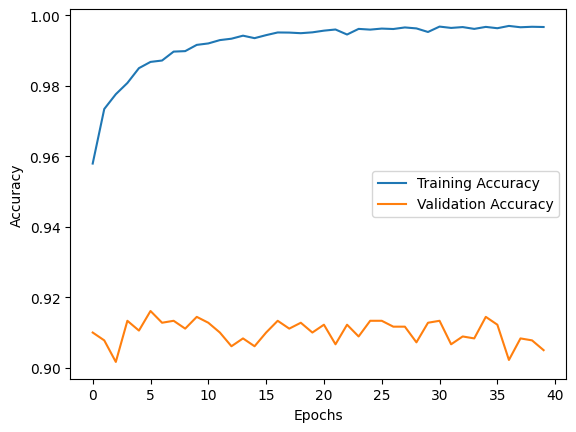

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
loss, accu = model.evaluate(x_test, y_test, verbose=1)

print('Test Loss : ', loss)
print('\nTest Accuracy : ', accu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9036 - loss: 1.0227
Test Loss :  0.9785705208778381

Test Accuracy :  0.9053999781608582


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [22]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [23]:

# Convert predicted probabilities to class labels
y_pred = np.argmax(predictions, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=class_names)

print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.81      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.83      0.86      0.85      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.83      0.86      0.84      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.75      0.74      0.75      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

